# Data project: Price cycles in the market for prescription drugs after patent expiry

## Introduction

In this project we will attempt to show the cyclic behaviour in some medical prices after the patent has expired, observed by the study "Priscykler i markedet for receptpligtig medi- cin efter patentudløb”. It will serve to demonstrate the matter by involving key points from competition theory by Maskin and Tirole (1988). 


Furthermore, an empiri- cal analysis is conducted based the theoretical phenomena Edgeworth cycles equilibrium, which requires that the competing firms in the market follows mixed strategies when set- ting prices. The firms compete until the price level reaches marginal cost they earn zero profit. From here the firms wish to raise their prices, but each would like the other to raise its price first so as to be able to undercut. The assumption of mixed strategies consist of each firm relents with probability less than one. The empirical analysis is based on obser- ved price cycles in the market for the anti-depressive drug, Mirtazapin. The hypothesis concerning whether the firms price setting is followed by mixed strategies is rejected, since the pattern in the price leadership is not random. The theory by Tappata takes another perspective and investigates if the price cycles occurs on behalf of consumers behaviour. Based on all these considerations, the discussion questions whether or not the market should be regulated.

Import and set magics: 

In [93]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import ipywidgets as widgets
import seaborn as sns; sns.set()


In [63]:
#1. Importing excel sheet for analysis
medprices_dk = pd.read_excel('meddata.xlsx')
medprices_dk

,ATC,Lægemiddel,Varenummer,Pakning,Styrke,Form,Firma,Indikator,20150202,20150216,...,20191118,20191202,20191216,20191230,20200113,20200127,20200210,20200224,20200309,20200323
0,A01AA01,Bifluorid,42846,4 g + solvens,NaN,dentalsuspension,Voco,AIP,407.36,407.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A01AA01,Bifluorid,42846,4 g + solvens,NaN,dentalsuspension,Voco,AUP,570.25,570.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A01AA01,Bifluorid,42846,4 g + solvens,NaN,dentalsuspension,Voco,DDD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A01AA01,Bifluorid,42846,4 g + solvens,NaN,dentalsuspension,Voco,AUP_pr_DDD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A01AA01,Bifluorid,43158,10 g,NaN,dentalsuspension,Voco,AIP,602.07,602.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64863,V08DA05,SonoVue,5615,1 sæt,8 mikroliter/ml,"pulver og solvens til injektionsvæske, disperg...",Bracco Imaging Scandinavia,AUP_pr_DDD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64864,V08DA05,SonoVue,589726,1 sæt (Orifarm),8 mikroliter/ml,"pulver og solvens til injektionsvæske, disperg...",Orifarm,AIP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64865,V08DA05,SonoVue,589726,1 sæt (Orifarm),8 mikroliter/ml,"pulver og solvens til injektionsvæske, disperg...",Orifarm,AUP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64866,V08DA05,SonoVue,589726,1 sæt (Orifarm),8 mikroliter/ml,"pulver og solvens til injektionsvæske, disperg...",Orifarm,DDD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
# 2. Editing frame structure

english = {'Lægemiddel':'Medicine', 
                  'Varenummer':'Product_number', 
                  'Pakning':'Packaging', 
                  'Styrke':'Strength', 
                  'Firma':'Company', 
                  'Indikator':'Indicator'}
medprices_dk.rename(columns = english, inplace=True) # Convert columns from Danish to English

column_v = list(medprices_dk.columns.values) # Create list of dataframes column names
column_v= column_v[8:]# narrow list to only focus on date variables

date_to_string = {} # Create dictionary for renaming date variables

# Loop throught all possible date variables and add an e in front as variables in python cannot begin with a numbers
for i in column_v:
    date_to_string[i] = f'e{i}'

medprices_dk.rename(columns = date_to_string, inplace=True) # Rename date variables in primary dataframe

In [ ]:
# 3. Creating a subdataframe from the primary dataframe focusing on the medicine Lamotrigin

In [65]:
medprices_dk_copy = medprices_dk.copy()
lamotrigin=medprices_dk_copy.loc[medprices_dk_copy['Medicine'].isin(['Lamotrigin "1A Farma"', 'Lamotrigin "Stada"', 'Lamotrigin "Orifarm"','Lamotrigin "Bluefish"','Lamotrigin "Aurobindo"', 'Lamotrigin "Amneal"', 'Lamotrigin "Abacus Medicine"', 'Lamotrigin "Mylan"']) ]
I=lamotrigin.Indicator.str.contains('AUP_pr_DDD')
lamotrigin=lamotrigin.loc[I, :]
drop_list=['ATC', 'Form', 'Medicine']
lamotrigin.drop(drop_list, axis=1, inplace=True)
lamotrigin.reset_index()


,index,Product_number,Packaging,Strength,Company,Indicator,e20150202,e20150216,e20150302,e20150316,...,e20191118,e20191202,e20191216,e20191230,e20200113,e20200127,e20200210,e20200224,e20200309,e20200323
0,40959,60406,60 stk. (blister),100 mg,1A Farma,AUP_pr_DDD,2.672500,4.430000,4.430000,4.430000,...,19.615000,19.615000,NaN,NaN,NaN,NaN,8.905000,6.005000,6.005000,10.390000
1,40963,70380,60 stk. (blister),100 mg,1A Farma,AUP_pr_DDD,4.510000,3.760000,3.760000,3.350000,...,15.150000,14.895000,14.895000,14.895000,12.345000,12.345000,12.345000,12.345000,12.345000,12.345000
2,40967,83373,60 stk. (blister),50 mg,1A Farma,AUP_pr_DDD,6.700000,4.025000,3.850000,6.665000,...,27.055000,27.055000,27.055000,27.055000,26.985000,26.985000,20.915000,20.915000,20.915000,20.915000
3,40971,95506,100 stk. (blister),100 mg,1A Farma,AUP_pr_DDD,5.985060,5.985060,6.723067,6.723067,...,5.886059,5.886059,5.886059,5.886059,4.858549,4.615546,4.615546,4.615546,8.701587,8.701587
4,40975,150553,60 stk. (blister),200 mg,1A Farma,AUP_pr_DDD,1.982500,1.760000,1.691250,1.537500,...,2.706250,2.706250,NaN,NaN,NaN,NaN,15.343750,15.343750,15.343750,NaN
5,40979,172849,50 stk. (blister),200 mg,1A Farma A/S,AUP_pr_DDD,1.599016,1.764018,1.764018,1.624516,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,40983,399531,60 stk. (blister),200 mg,1A Farma A/S,AUP_pr_DDD,2.673750,1.742500,1.742500,1.675000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,40987,402064,100 stk. (blister),200 mg,1A Farma,AUP_pr_DDD,1.455743,1.455743,1.424993,1.424993,...,4.342478,4.342478,3.671232,3.671232,3.195734,3.195734,2.873986,2.873986,2.570237,3.339733
8,40991,417392,60 stk. (blister),50 mg,1A Farma,AUP_pr_DDD,21.455000,6.835000,6.290000,6.290000,...,NaN,10.405000,10.405000,9.865000,9.840000,9.570000,9.570000,9.570000,13.765000,13.765000
9,40995,419337,50 stk. (blister),100 mg,1A Farma A/S,AUP_pr_DDD,3.281934,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
# 4. Create long format of dataframe 

lamotrigin_long= pd.wide_to_long(lamotrigin, stubnames='e', i="Product_number", j='Date') # Created long format of the lamotrigin Dataframe
e_grouped = lamotrigin_long.groupby('Product_number')['e'] # Grouped by product number
lamotrigin_long= lamotrigin_long.sort_values(['Product_number','Date']) # Organized product number by date
lamotrigin_long

Strength       Company           Packaging  \
Product_number Date                                                  
23167          20150202   200 mg  PharmaCoDane  100 stk. (blister)   
               20150216   200 mg  PharmaCoDane  100 stk. (blister)   
               20150302   200 mg  PharmaCoDane  100 stk. (blister)   
               20150316   200 mg  PharmaCoDane  100 stk. (blister)   
               20150330   200 mg  PharmaCoDane  100 stk. (blister)   
...                          ...           ...                 ...   
577306         20200127     5 mg  PharmaCoDane   60 stk. (blister)   
               20200210     5 mg  PharmaCoDane   60 stk. (blister)   
               20200224     5 mg  PharmaCoDane   60 stk. (blister)   
               20200309     5 mg  PharmaCoDane   60 stk. (blister)   
               20200323     5 mg  PharmaCoDane   60 stk. (blister)   

                          Indicator           e  
Product_number Date                              
23167          20150202  AUP_pr_DDD    1.455743  
               20150216  AUP_pr_DDD    1.424993  
               20150302  AUP_pr_DDD    1.424993  
               20150316  AUP_pr_DDD    1.424993  
               20150330  AUP_pr_DDD    1.865241  
...                             ...         ...  
577306         20200127  AUP_pr_DDD  121.450000  
               20200210  AUP_pr_DDD  121.450000  
               20200224  AUP_pr_DDD  121.450000  
               20200309  AUP_pr_DDD  121.450000  
               20200323  AUP_pr_DDD  121.450000  

[6615 rows x 5 columns]

## Exploring dataset


Average price per daily dose

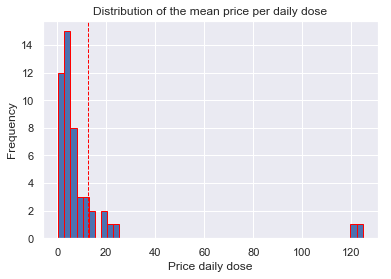

In [112]:
# Calculated mean value of each product number 
e_mean = lamotrigin_long.groupby('Product_number')['e'].mean() 
e_mean.name ='e_mean'
lamotrigin_new = lamotrigin.set_index('Product_number').join(e_mean, how='left') #merged mean values into original wide dataframe

# Plot the distribution of price per daily dose in lamotrigin_new
plt.hist(lamotrigin_new['e_mean'], bins=50, align='left', color='b', edgecolor='red',
              linewidth=1)
 
# Add axis labels
plt.xlabel("Price daily dose")
plt.ylabel("Frequency")
plt.title("Distribution of the mean price per daily dose")
plt.axvline(lamotrigin_new['e_mean'].mean(), color='red', linestyle='dashed', linewidth=1)

plt.show()

In [ ]:
# Calculated mean value of each product number 
e_mean = lamotrigin_long.groupby('Product_number')['e'].mean() 
e_mean.name ='e_mean'
lamotrigin_new = lamotrigin.set_index('Product_number').join(e_mean, how='left') #merged mean values into original wide dataframe

# Plot the distribution of price per daily dose in lamotrigin_new
plt.hist(lamotrigin_new['e_mean'], bins=50, align='left', color='b', edgecolor='red',
              linewidth=1)
 
# Add axis labels
plt.xlabel("Price daily dose")
plt.ylabel("Frequency")
plt.title("Distribution of the mean price per daily dose")
plt.axvline(lamotrigin_new['e_mean'].mean(), color='red', linestyle='dashed', linewidth=1)

plt.show()

In [115]:
ax = sns.scatterplot(x='e', y='Date', data=lamotrigin_long)


ValueError: Could not interpret input 'Date'